In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import load_iris

In [4]:
dataset=load_iris()

In [5]:
print(dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(df)

StandardScaler()

In [13]:
scaled_features=scaler.transform(df)

In [17]:
df_feat=pd.DataFrame(scaled_features)
df_feat.head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [20]:
from sklearn.model_selection import train_test_split

In [22]:
x=dataset.data
y=dataset.target

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn=KNeighborsClassifier(n_neighbors=1)

In [27]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [29]:
predict = knn.predict(x_test)
predict

array([1, 0, 2, 0, 1, 0, 0, 2, 1, 1, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 0, 2,
       1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1,
       2])

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
confusion_matrix(y_test,predict)

array([[18,  0,  0],
       [ 0,  9,  1],
       [ 0,  1, 16]], dtype=int64)

In [34]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.90      0.90      0.90        10
           2       0.94      0.94      0.94        17

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [37]:
error=[]
for i in range(1,60):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    p=knn.predict(x_test)
    error.append(np.mean(p!=y_test))
    
error

[0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.06666666666666667,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.066666666666666

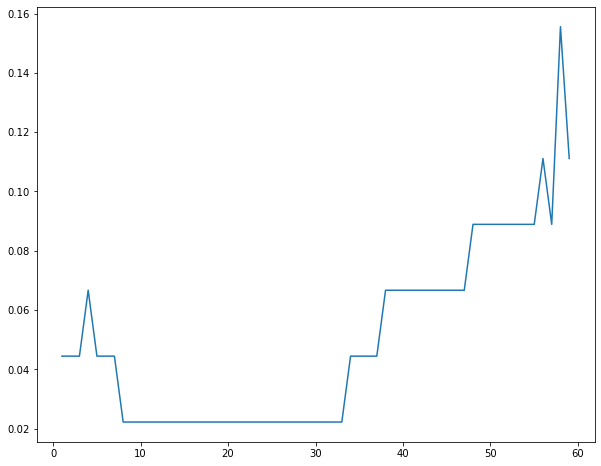

In [50]:
plt.figure(figsize=(10,8))
plt.plot(range(1,60),error)

In [52]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
predict=knn.predict(x_test)
print('FOR K=10')
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

FOR K=10
[[18  0  0]
 [ 0 10  0]
 [ 0  1 16]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.91      1.00      0.95        10
           2       1.00      0.94      0.97        17

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45

